In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/man-juu/ML/main/markdataset3.csv')
df

,mark1,mark2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [ ]:
X = df[['mark1', 'mark2']]
y = df['admitted']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = MinMaxScaler()
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
scaled_X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns, index=X_val.index)
scaled_X_train.head()

,mark1,mark2
11,0.644338,0.000000
47,0.970528,0.822143
85,0.550526,0.805539
28,0.455379,0.287886
93,0.636871,0.794564


In [ ]:
df = pd.concat([pd.DataFrame(scaled_X_train,columns=['mark1','mark2']),pd.DataFrame(y_train,columns=['admitted'])], axis=1, join='inner')

In [ ]:
modelNB = GaussianNB()

NBtrain = modelNB.fit(scaled_X_train, y_train)

In [ ]:
y_pred = NBtrain.predict(scaled_X_val)
pd.DataFrame({'y_test': y_val, 'y_pred': y_pred})

,y_test,y_pred
83,1,0
53,0,0
70,0,0
45,0,0
44,0,0
39,0,0
22,0,0
80,1,1
10,0,1
0,0,0


In [ ]:
print(accuracy_score(y_pred,y_val))

0.8


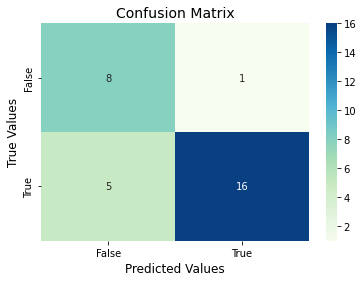

In [ ]:
conf_mtx = confusion_matrix(y_val, y_pred)
ax = sns.heatmap(conf_mtx, xticklabels=(['False','True']), yticklabels=(['False','True']), cmap='GnBu',annot=True)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('True Values', fontsize=12)
plt.show()

In [ ]:
print('CLASSIFICATION REPORT:\n', classification_report(y_val, y_pred))

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.62      0.89      0.73         9
           1       0.94      0.76      0.84        21

    accuracy                           0.80        30
   macro avg       0.78      0.83      0.78        30
weighted avg       0.84      0.80      0.81        30



In [ ]:
print("F1-Score : " + str(f1_score(y_val, y_pred, average='micro')))

F1-Score : 0.8000000000000002
